# Sales Prediction with Linear Regression

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [64]:
pd.set_option("display.float_format", lambda x: "%.4f" %x)


In [66]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/advertising.csv")

In [68]:
#bağımsız değişkenlerin değerlerinde ortaya çıkan gözlemlere göre bir bağımlı değişken (sales) ortaya çıkmış.
df.head(10)

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000
5,8.7000,48.9000,75.0000,7.2000
6,57.5000,32.8000,23.5000,11.8000
7,120.2000,19.6000,11.6000,13.2000
8,8.6000,2.1000,1.0000,4.8000
9,199.8000,2.6000,21.2000,10.6000


In [70]:
df.shape

(200, 4)

In [72]:
X = df[["TV"]]
X

,TV
0,230.1000
1,44.5000
2,17.2000
3,151.5000
4,180.8000
...,...
195,38.2000
196,94.2000
197,177.0000
198,283.6000


In [73]:
y = df[["sales"]]
y

,sales
0,22.1000
1,10.4000
2,9.3000
3,18.5000
4,12.9000
...,...
195,7.6000
196,9.7000
197,12.8000
198,25.5000


In [74]:
#sales ve tv arasıdna var olduğunu varsaydığımız doğrusal ilişkiyi modelleyeceğiz
#sonra da bu modeli bir grafik yardıkmıyla değerlednireceğiz.


In [75]:
#linear regression kullanarak modeli kuralım.
reg_model=LinearRegression().fit(X,y)


In [76]:
#Linear Reg. tek değişkenli oldugunda kullanıdğımız formül --> y_hat = b + w.x
#buradaki x = tv dur.


In [77]:
#Linear Reg. tek değişkenli oldugunda kullanıdğımız formül --> y_hat = b + w.x

#şimdi modelden ihtiyacımız olan değerleri çek.
reg_model.intercept_[0] # sabit olan b (bias) verir.


7.032593549127693

In [78]:
#w1 yani tv nin katsayısı(coef)
reg_model.coef_[0][0]

0.047536640433019764

In [79]:
#Doğrusal Regresyonda Tahmin İşlemleri
#Mesela 150 birimlik tv harcaması olsa ne kadar satış olması beklenir.(formülde ilgili değerleri yerine koy)

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [80]:
#500 birimlik tv harcaması olsa ne kadar satış olur?
reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637574

In [81]:
#describe attığında tv nun max değerinin 296 oldugunu görüyorsun. yani 500 birimlik bir tv harcaması yok.
#ama sen elinde olmayan veirye karşılık olarak da tahmin yürütebiliyorsun, yani doğrusal ilişkidesatışın ne olacağını tahmin edebilirim.
df.describe()

,TV,radio,newspaper,sales
count,200.0000,200.0000,200.0000,200.0000
mean,147.0425,23.2640,30.5540,14.0225
std,85.8542,14.8468,21.7786,5.2175
min,0.7000,0.0000,0.3000,1.6000
25%,74.3750,9.9750,12.7500,10.3750
50%,149.7500,22.9000,25.7500,12.9000
75%,218.8250,36.5250,45.1000,17.4000
max,296.4000,49.6000,114.0000,27.0000


# Modelin Görselleştirilmesi
#grafikte gerçek değrler mavi noktalar
#kırmızı çizgi ise modelin kendisi, tahmin edilen değerlerdir.
#regresyon grafiği için sns kütüphanesinden regplot kullanıyorum.
#x= bağımsız değişken
#y = bağımlı değişken
#grafikte kullanacağımız renkler scatter_kws de tanımlı
#ci = güven aralığı argümanı= false yani güven aralığı ekleme
#color= "r" --> regresyon çizgisinin rengi ne olsun
#set_title grafiğe ana başlık ekler. burada dinamik bir biçimlendirme yapılmış her değişkene özgün olaraka değişecektir.
#plt.xlim(-10,310) --> x eksenini -10 dan 310 a kadr görselleştir.
#ylim de de 0 dan başla.

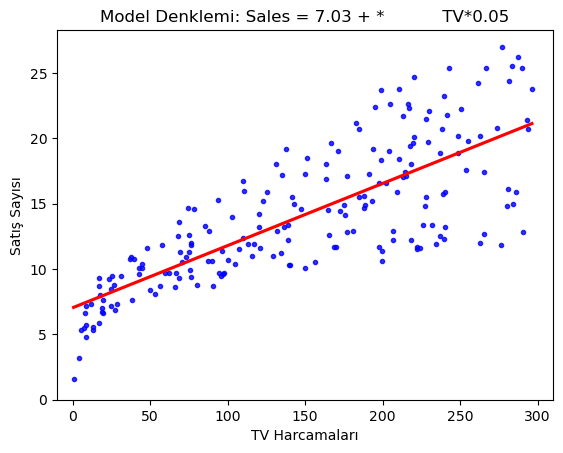

In [82]:

#Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={"color": "b", "s": 9},
               ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0],2)} + *\
           TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

# TAHMİN BAŞARISI
burada aynı değerler için mae,mse,rmse değerlerine bakıp bir yorum yapamaazsın. Modelde bir değişikliğine gittiğinde önceki mae değeri ile sonraki mae değerini karşılaştırabilirsin. veya önceki rmse değeriyle sonra ki rms yi. 

In [83]:
#MSE
#mean_squared_error  (mse)methoduna gerçek değerler ve tahmini değerler verilir. bunların farklarının karelerının toplamının ortalamasını alır ve ortalama bir hata çıkarır.
y_pred = reg_model.predict(X)
y_pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [84]:
y

,sales
0,22.1000
1,10.4000
2,9.3000
3,18.5000
4,12.9000
...,...
195,7.6000
196,9.7000
197,12.8000
198,25.5000


In [85]:
mean_squared_error(y, y_pred) #çıkan sonuç iyi mi kötü mü? bilmiyorum. mümkün olduğunca sıfıra kadar götürmeye çalışıyorum.

10.512652915656757

In [86]:
#bağımlı değişkenin (satışlar) ortalamasını al
y.mean()

sales   14.0225
dtype: float64

In [87]:
y.std()

sales   5.2175
dtype: float64

In [88]:
#eğer hatanın büyüklüğünü neye göre yorrumlayacağımı bilmiyorsam bağımlı değişkenin std ve mean alınır.
#standart sapma ve ortalamayı bılıyordun bu durumda hatada 14-5 ile 14+5 arasında olmasını beklerim.
#9 < 10 < 19  o zaman sonuç çok da iyi değil.
#çünkü evet arasında yer alıyor ama benim ortalamam 14 birimdi. 14 birimde 10 birim hata yapmam az değil.

In [89]:
#RMS
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [90]:
#MAE
mean_absolute_error(y,y_pred)

2.549806038927486

In [91]:
#R-KARE (bağımsız değişken ve bağımlı değişken girilir)
#doğrusal regrasyon modelleirnde modelin başarısına ilişkin önemlidir.
#veri setindeki bağımsız değişkenlerin bağımlı değişkenleri açıklama yüzdesini ifade eder.
reg_model.score(X,y)

0.611875050850071

In [92]:
#değişken sayısı arttıkça r2 şişmeye meyillidir. burada düzeltilmiş r2 değerini göz önünde bulundurmalıyız.
#basit doğrusal regrasyonda, çoklu doğrusaş regresyonda yüksek başarılı modeller değillerdir.

# Multiple Linear Regression
Çoklu doğrusal regresyon modeli
burada birden fazla bağımsızz değişken olacak. 
veri setinin tamamı modellenir.
diğer değişkenleride kullanarak çoklu doğrusal regresyon modelini kurmaya çalışıyoruz.

In [93]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/advertising.csv")

In [94]:
#diğer değişkenleri seçelim.
#sales değişkenini drop edince geriye kalanlar senin bağımsmız değişkenlerin olacak.
X = df.drop("sales", axis = 1)

In [95]:
y = df[["sales"]]

In [96]:
#Modelleme
#modelleme yapacağımız zaman train test diye ayırmalıyız
X_train, X_test, y_train, y_test = train_test_split(X, y,            #bu değişkenleri al
                                                    test_size=0.20,  #test setinin boyutu %20 
                                                    random_state=1)  #rastgele bir örneklem oluştur.






In [97]:
y_test.shape   #test seti ile test edeceğiz.


(40, 1)

In [98]:
y_train.shape   #train seti ile model kuracağız.

(160, 1)

In [99]:
reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_


array([2.90794702])

In [100]:
# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

# Çoklu Doğrusal Regresyonda Tahmin İşlemleri 

b= 6.7997
w= 0.0492
b,w değerlerini tahmin etmiştik.şimdi bunları kuanarak bazı değerleri tahmin edeceğiz. (bende çıkan çıktı ile hocanınkiler farklı hoca da b=2.90 ve w değerleri= 0.0468431 , 0.17854434, 0.00258619)
Burada model denklemini yazmayı mülakatlarda soruyormuş.

In [101]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90 + 30 * 0.04+ 10 * 0.17 + 40 * 0.002

5.88

In [102]:
#bu hesaplamayı fonksiyonel bir şekilde yapmak istersem;bunun için bir liste oluştururm
#ve bu liste 30, 10, 40 birimleri ifade eder.
yeni_veri= [[30],[10],[40]]


In [103]:
#daha sonra bunu pd.Dataframe ile dataframe çeviriyorum.
yeni_veri = pd.DataFrame(yeni_veri).T


In [104]:
#reg.model(benim model nesnem).predict ile tahmin et diyorum.
#tahmin edeceği şeyde parantez içine girilir.
#bağımsız değişkenler girilir. o da gider model nesnesine sorar ve bağımlı değişken tahmininde bulunur.
reg_model.predict(yeni_veri)



C:\Users\esman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

# Çoklu Doğrusal RegresyondaTahmin Başarısını Değerlendirme
train seti başarısı, test başarısı başarısı, cross validition değerlendirme -->hangisine bakmalıyım??

TRAİN RMSE
Train setinde -->regresyon modelini kurduk. train setinin bağımlı değişkenini de tahmin edip kenarda saklayabilirim.ve bunun mse değerine erişebiliriz. bu bizim train rmse hatamızdır


In [105]:
#TRAİN RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

#daha önceden (tek değişkenlide) hata oranı 3.74 idi şuan 1.73 . Ciddi anlamda bir düşüş var

1.736902590147092

In [106]:
# TRAIN RKARE (BAĞIMSIZ DEĞİŞKENLERİN BAĞIMLI DEĞİŞKENLERİ ETKİLEME- AÇIKLAMA ORANIDIR.)
#daha önceden (tek değişkenlide) %60 larda olan değer %89 çıktı. çünkü 3 yeni değişken ekledim.
reg_model.score(X_train, y_train)

0.8959372632325174

In [107]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.411341755858158

In [108]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615385

In [109]:
# 10 Katlı CV RMSE
#negatif ortalama hatayı alır.
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051797

# GRADİENT DESCENT İLE DOĞRUSAL REGRESYON

In [110]:
#Cost Function = mse değerini hesaplar.
def cost_function(Y, b, w, X):
    m = len(Y) #gözlem sayısı tutulur.
    sse = 0    #sse=some of squaler error
   
#tüm gözlemleri for ile gez.
    for i in range(0, m):
        y_hat = b+ w*X[i] #tahmin edilen y değerleri hesaplanır
        y = Y[i]          # i.indexdeki gerçek y değerleri var
        sse += (y_hat - y) **2
    mse = sse / m
    return mse
        

In [111]:
#update weights
#learning_rate=öğrenme hızı
def update_weights(Y,b,w,X,learning_rate):
    m = len(Y) #gözlem sayısı tutulur.
    #hesaplayacağım türevleri tutuyorum
    b_deriv_sum = 0 
    w_deriv_sum = 0
    
    for i in range(0,m):
        y_hat = b + w * X[i] #tahmin edilen değer
        y = Y[i]             #gerçek değer
        b_deriv_sum += (y_hat - y)       #sabitin tüevi formülü
        w_deriv_sum += (y_hat - y)* X[i] #ağırlığın türevi formülü
    new_b = b - (learning_rate *1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w
    

In [112]:
# train fonksiyonu: cost ve update weights fonks yapılan işlemleri belirli bir sayı için tekrar etme
#initial_b, initial_w --> çalışmanın başında vereceğim b,w değerleridir.
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):
    #biwimse değerlerinin ilk halini yazar. burası ilk hatanın raporlandığı bölüm.
    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    
    #her iterasyonda hataları hesaplayacağız. her iterasyonda bu hataları bu listede tutacağım.
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)  #verilen ilk ağırlıkları güncelle
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)

        #binlerce iterayon yaptığımızda aporlama kısmıdır. her 100 de i raporlar
        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))

    #işlem sonrası hesaplanan değerler yazdırılır.son raporlama
    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


In [113]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000
...,...,...,...,...
195,38.2000,3.7000,13.8000,7.6000
196,94.2000,4.9000,8.1000,9.7000
197,177.0000,9.3000,6.4000,12.8000
198,283.6000,42.0000,66.2000,25.5000


In [114]:
X = df["radio"]

In [115]:
Y = df["sales"]

In [116]:

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)



Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25